In [ ]:


import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/train_data-1611220940820.csv')

In [ ]:
data

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2016-11-30 13:40:45+00:00,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2017-01-08 08:35:31+00:00,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,2016-12-26 21:47:08+00:00,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2016-12-11 13:44:06+00:00,2,0


preprocessing

In [ ]:
data.head(5)

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [ ]:
data.tail(5)

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2016-11-30 13:40:45+00:00,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2017-01-08 08:35:31+00:00,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,2016-12-26 21:47:08+00:00,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2016-12-11 13:44:06+00:00,2,0
76528,1051344513778987,6754801,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-11 19:08:18+00:00,2,0


In [ ]:
data.shape

(76529, 11)

In [ ]:
data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [ ]:
data.describe(include='all')

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529,76529.000000,76529,76529,76529,76529.000000,76529,76529.000000,76529.000000
unique,NaN,NaN,6,NaN,9,1,4,NaN,75811,NaN,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN,NaN
freq,NaN,NaN,30538,NaN,36306,76529,45560,NaN,12,NaN,NaN
mean,6.940200e+14,1.247483e+07,NaN,58497.189105,NaN,NaN,NaN,132.724348,NaN,2.255707,0.002012
std,7.867885e+14,1.205878e+07,NaN,36740.216787,NaN,NaN,NaN,2350.110900,NaN,0.732174,0.044814
min,8.000000e+00,1.000000e+00,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,NaN,78890.000000,NaN,NaN,NaN,52.000000,NaN,2.000000,0.000000


In [ ]:
data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [ ]:
data.corr()


,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud
transaction_number,1.000000,-0.006608,0.001564,0.001049,-0.006492,0.002447
user_id,-0.006608,1.000000,-0.037846,-0.045650,0.424626,-0.000064
partner_id,0.001564,-0.037846,1.000000,0.092432,-0.185584,0.062991
money_transacted,0.001049,-0.045650,0.092432,1.000000,-0.066396,0.570388
partner_pricing_category,-0.006492,0.424626,-0.185584,-0.066396,1.000000,-0.034002
is_fraud,0.002447,-0.000064,0.062991,0.570388,-0.034002,1.000000


droping

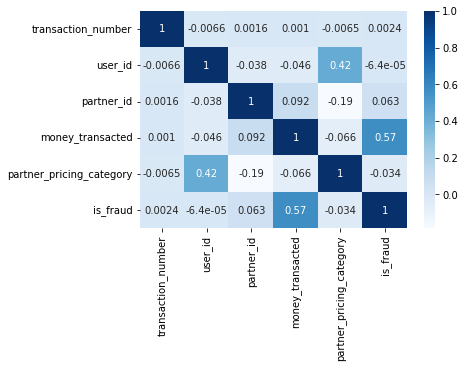

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(),cmap='Blues',annot=True)

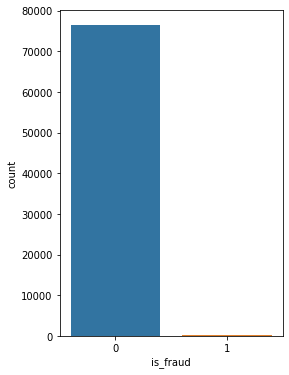

0    76375
1      154
Name: is_fraud, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,6))
sns.countplot(x="is_fraud",data=data)
plt.show()

data.is_fraud.value_counts()

In [ ]:
data.is_fraud.value_counts(normalize = True)*100

0    99.798769
1     0.201231
Name: is_fraud, dtype: float64

In [ ]:
frauds =len(data[data.is_fraud == 1])
nonfrauds = len(data[data.is_fraud ==0])
print("frauds",frauds)
print("non-frauds",nonfrauds)


frauds 154
non-frauds 76375


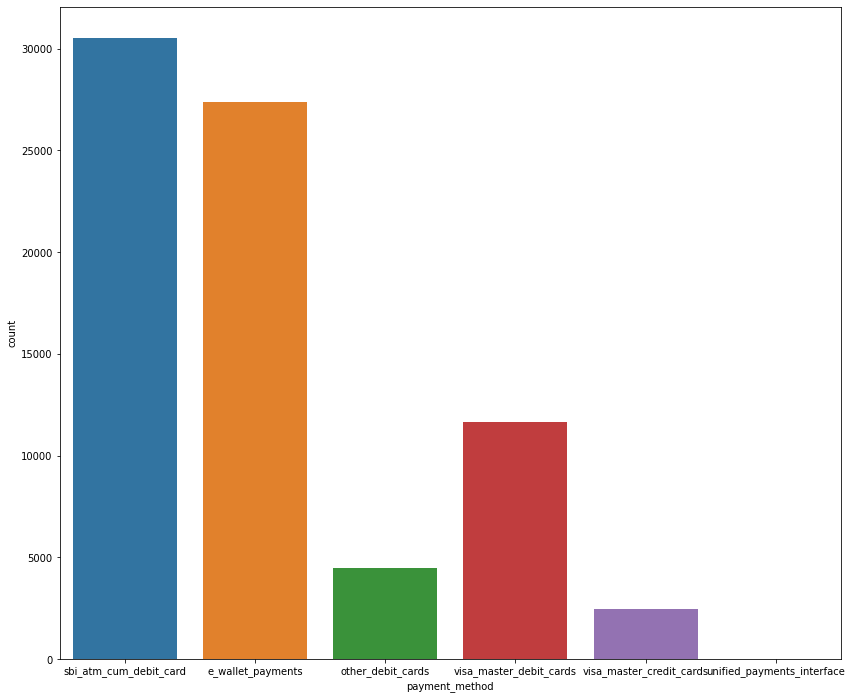

sbi_atm_cum_debit_card        30538
e_wallet_payments             27384
visa_master_debit_cards       11643
other_debit_cards              4495
visa_master_credit_cards       2454
unified_payments_interface       15
Name: payment_method, dtype: int64

In [ ]:
plt.figure(figsize=(14,12))
sns.countplot(x="payment_method",data=data)
plt.show()

data.payment_method.value_counts()

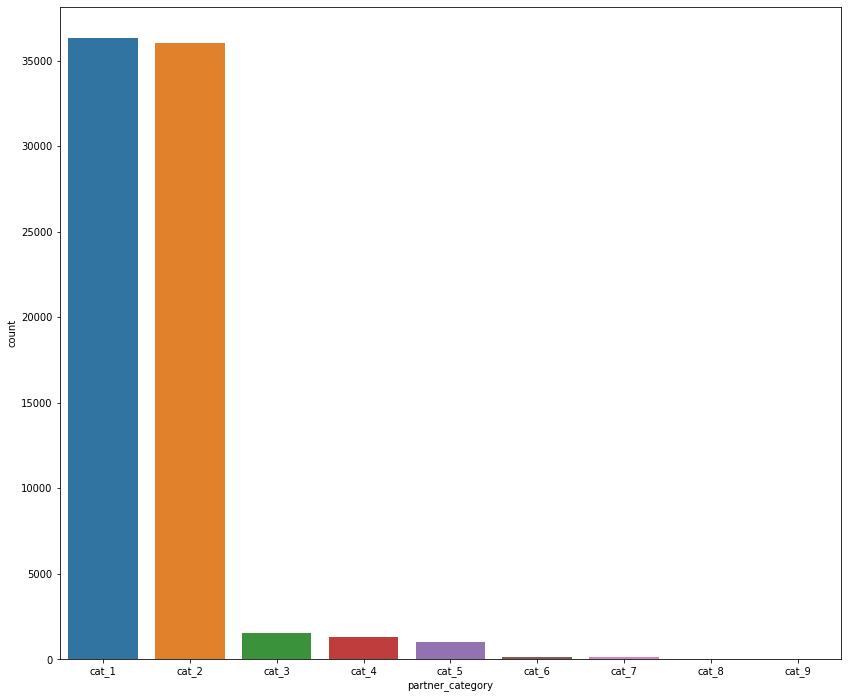

cat_1    36306
cat_2    36019
cat_3     1536
cat_4     1310
cat_5     1026
cat_7      165
cat_6      146
cat_8       19
cat_9        2
Name: partner_category, dtype: int64

In [ ]:
plt.figure(figsize=(14,12))
sns.countplot(x="partner_category",data=data)
plt.show()

data.partner_category.value_counts()

In [ ]:
obj_attr=data.select_dtypes('object').columns
for i in obj_attr:
  print(data[i].nunique())
  print(data[i].value_counts())

6
sbi_atm_cum_debit_card        30538
e_wallet_payments             27384
visa_master_debit_cards       11643
other_debit_cards              4495
visa_master_credit_cards       2454
unified_payments_interface       15
Name: payment_method, dtype: int64
9
cat_1    36306
cat_2    36019
cat_3     1536
cat_4     1310
cat_5     1026
cat_7      165
cat_6      146
cat_8       19
cat_9        2
Name: partner_category, dtype: int64
1
IND_INR    76529
Name: country, dtype: int64
4
other_pcs          45560
android_devices    29662
ios_devices          876
windows_pcs          431
Name: device_type, dtype: int64
75811
2016-12-24 16:30:13+00:00    12
2016-11-15 07:03:26+00:00     7
2016-12-24 16:30:12+00:00     6
2017-01-04 04:29:41+00:00     4
2017-02-01 10:58:34+00:00     4
                             ..
2016-11-19 06:18:42+00:00     1
2016-11-21 08:57:53+00:00     1
2016-12-13 08:52:02+00:00     1
2016-11-26 11:07:53+00:00     1
2017-01-11 19:08:18+00:00     1
Name: transaction_initiation, Leng

In [ ]:
data.drop(["partner_id","country"],axis=1,inplace=True))

In [ ]:
data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_category',
       'device_type', 'money_transacted', 'transaction_initiation',
       'partner_pricing_category', 'is_fraud'],
      dtype='object')

converting into category

In [ ]:
data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_category             object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [ ]:
dataCatt = (["payment_method","partner_category","device_type"])
data[dataCatt]=data[dataCatt].astype('category')

In [ ]:
data.dtypes

transaction_number             int64
user_id                        int64
payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
transaction_initiation        object
partner_pricing_category       int64
is_fraud                       int64
dtype: object

In [ ]:
data.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_category            0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [ ]:
data['transaction_year']= data['transaction_initiation'].apply(lambda x:np.int(x[0:4]))
data['transaction_month']=data['transaction_initiation'].apply(lambda x:np.int(x[5:7]))
data['transaction_day']=data['transaction_initiation'].apply(lambda x:np.int(x[8:10]))
data['transaction_time']=data['transaction_initiation'].apply(lambda x:(x[11:19]))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

In [ ]:
def get_sec(time_str):
  h,m,s =time_str.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

In [ ]:
data['transaction_time']=data['transaction_time'].apply(lambda x:get_sec(x))


In [ ]:
data=data.drop(['transaction_initiation'],axis=1)

label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
data['partner_category']=le.fit_transform(data['partner_category'])
data['device_type']=le.fit_transform(data['device_type'])
data['partner_pricing_category']=le.fit_transform(data['partner_pricing_category'])
data['payment_method']=le.fit_transform(data['payment_method'])
data['transaction_number']=le.fit_transform(data['transaction_number'])


train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = data["is_fraud"]
x = data.drop('is_fraud',axis = 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)


(53570, 11)
(22959, 11)
(53570,)
(53570,)


standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_attr=x_train.select_dtypes(['int64','float64']).columns
num_attr

Index(['transaction_number', 'user_id', 'payment_method', 'partner_category',
       'device_type', 'money_transacted', 'partner_pricing_category',
       'transaction_year', 'transaction_month', 'transaction_day',
       'transaction_time'],
      dtype='object')

In [ ]:
Scalar=StandardScaler()
Scalar.fit(x_train[num_attr])


StandardScaler()

In [ ]:
x_train[num_attr] = Scalar.transform(x_train[num_attr])
x_test = Scalar.transform(x_test[num_attr])

In [ ]:
print(x_train.shape)
print(x_test.shape)

(53570, 11)
(22959, 11)


model building

logistic regression

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,classification_report

In [ ]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_train = Lr.predict(x_train)
y_pred_test = Lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
f1_score(y_train,y_pred_train)

0.42666666666666664

In [ ]:
f1_score(y_test,y_pred_test)

0.4871794871794871

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22907
           1       0.73      0.37      0.49        52

    accuracy                           1.00     22959
   macro avg       0.86      0.68      0.74     22959
weighted avg       1.00      1.00      1.00     22959



decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
f1_score(y_train,y_pred_train)


1.0

In [ ]:
f1_score(y_test,y_pred_test)

0.8461538461538461

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22907
           1       0.85      0.85      0.85        52

    accuracy                           1.00     22959
   macro avg       0.92      0.92      0.92     22959
weighted avg       1.00      1.00      1.00     22959



random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
f1_score(y_train,y_pred_train)


1.0

In [ ]:
f1_score(y_test,y_pred_test)

0.8333333333333333

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22907
           1       0.91      0.77      0.83        52

    accuracy                           1.00     22959
   macro avg       0.95      0.88      0.92     22959
weighted avg       1.00      1.00      1.00     22959



support vector machine

In [ ]:
from sklearn import svm

In [ ]:
svm1 = svm.SVC

In [ ]:
svm1 = svm.SVC(C=0.002,kernel='linear')
svm1.fit(x_train,y_train)

SVC(C=0.002, kernel='linear')

In [ ]:
y_pred_train = svm1.predict(x_train)
y_pred_test = svm1.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
f1_score(y_train,y_pred_train)


0.38571428571428573

In [ ]:
f1_score(y_test,y_pred_test)

0.39999999999999997

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22907
           1       0.78      0.27      0.40        52

    accuracy                           1.00     22959
   macro avg       0.89      0.63      0.70     22959
weighted avg       1.00      1.00      1.00     22959



knearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
f1_score(y_train,y_pred_train)

0.8202247191011237

In [ ]:
f1_score(y_test,y_pred_test)

0.7674418604651162

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22907
           1       0.97      0.63      0.77        52

    accuracy                           1.00     22959
   macro avg       0.98      0.82      0.88     22959
weighted avg       1.00      1.00      1.00     22959



In [ ]:
test_data = pd.read_csv('/content/test_data-1611220982388.csv')

In [ ]:
test_data

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2
...,...,...,...,...,...,...,...,...,...,...
19128,5332775378111,13235044,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2017-01-01 13:02:16+00:00,2
19129,939262915465237,12257001,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,30.0,2016-12-26 19:41:23+00:00,2
19130,18324574916544,5958481,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-24 04:29:06+00:00,4
19131,893473728055875,53919649,sbi_atm_cum_debit_card,78890,cat_2,IND_INR,android_devices,-500.0,2016-12-04 15:38:47+00:00,4


In [ ]:
test_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


In [ ]:
test_data.tail()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
19128,5332775378111,13235044,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2017-01-01 13:02:16+00:00,2
19129,939262915465237,12257001,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,30.0,2016-12-26 19:41:23+00:00,2
19130,18324574916544,5958481,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-24 04:29:06+00:00,4
19131,893473728055875,53919649,sbi_atm_cum_debit_card,78890,cat_2,IND_INR,android_devices,-500.0,2016-12-04 15:38:47+00:00,4
19132,84390778936647,14500864,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,40.0,2017-01-12 21:24:24+00:00,2


In [ ]:
test_data.shape

(19133, 10)

In [ ]:
test_data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category'],
      dtype='object')

In [ ]:
test_data.describe(include='all')

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
count,1.913300e+04,1.913300e+04,19133,19133.000000,19133,19133,19133,19133.000000,19133,19133.000000
unique,NaN,NaN,6,NaN,8,1,4,NaN,19090,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN
freq,NaN,NaN,7651,NaN,9099,19133,11375,NaN,5,NaN
mean,7.037622e+14,1.261609e+07,NaN,58656.424084,NaN,NaN,NaN,140.886995,NaN,2.257043
std,7.946458e+14,1.228365e+07,NaN,36692.507399,NaN,NaN,NaN,2883.975048,NaN,0.735934
min,1.000000e+00,3.600000e+01,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000
25%,4.313645e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000
50%,3.585617e+14,9.922500e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000
75%,1.184018e+15,1.796064e+07,NaN,78890.000000,NaN,NaN,NaN,60.000000,NaN,2.000000


In [ ]:
test_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

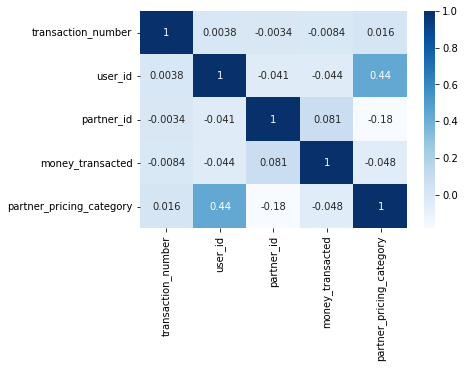

In [ ]:
import seaborn as sns
sns.heatmap(test_data.corr(),cmap='Blues',annot=True)

In [ ]:
obj_attr=test_data.select_dtypes('object').columns
for i in obj_attr:
  print(test_data[i].nunique())
  print(test_data[i].value_counts())

6
sbi_atm_cum_debit_card        7651
e_wallet_payments             6802
visa_master_debit_cards       2899
other_debit_cards             1148
visa_master_credit_cards       630
unified_payments_interface       3
Name: payment_method, dtype: int64
8
cat_1    9099
cat_2    9008
cat_3     384
cat_4     303
cat_5     253
cat_7      51
cat_6      29
cat_8       6
Name: partner_category, dtype: int64
1
IND_INR    19133
Name: country, dtype: int64
4
other_pcs          11375
android_devices     7479
ios_devices          172
windows_pcs          107
Name: device_type, dtype: int64
19090
2016-12-24 16:30:13+00:00    5
2016-11-15 07:03:27+00:00    3
2017-02-10 06:17:49+00:00    2
2017-02-01 12:06:41+00:00    2
2016-12-23 12:07:37+00:00    2
                            ..
2017-02-01 05:47:20+00:00    1
2016-12-07 06:07:40+00:00    1
2017-01-04 09:59:06+00:00    1
2017-01-08 11:04:18+00:00    1
2017-01-12 21:24:24+00:00    1
Name: transaction_initiation, Length: 19090, dtype: int64


In [ ]:
test_data.drop(["partner_id","country"],axis=1,inplace=True)

In [ ]:
test_data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_category',
       'device_type', 'money_transacted', 'transaction_initiation',
       'partner_pricing_category'],
      dtype='object')

In [ ]:
test_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_category             object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

In [ ]:
test_dataCatt = (["payment_method","partner_category","device_type"])
test_data[test_dataCatt]=test_data[test_dataCatt].astype('category')

In [ ]:
test_data.dtypes

transaction_number             int64
user_id                        int64
payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
transaction_initiation        object
partner_pricing_category       int64
dtype: object

In [ ]:
test_data.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_category            0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
dtype: int64

In [ ]:
test_data['transaction_year']= test_data['transaction_initiation'].apply(lambda x:np.int(x[0:4]))
test_data['transaction_month']=test_data['transaction_initiation'].apply(lambda x:np.int(x[5:7]))
test_data['transaction_day']=test_data['transaction_initiation'].apply(lambda x:np.int(x[8:10]))
test_data['transaction_time']=test_data['transaction_initiation'].apply(lambda x:(x[11:19]))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

In [ ]:
def get_sec(time_str):
  h,m,s =time_str.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

In [ ]:
test_data['transaction_time']=test_data['transaction_time'].apply(lambda x:get_sec(x))


In [ ]:
test_data=test_data.drop(['transaction_initiation'],axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
for i in data:
  print(i)

transaction_number
user_id
payment_method
partner_category
device_type
money_transacted
partner_pricing_category
is_fraud
transaction_year
transaction_month
transaction_day
transaction_time


In [ ]:
for j in test_data:
  print(j)

transaction_number
user_id
payment_method
partner_category
device_type
money_transacted
partner_pricing_category
transaction_year
transaction_month
transaction_day
transaction_time


In [ ]:
data.drop(['is_fraud'],axis=1)

,transaction_number,user_id,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,transaction_year,transaction_month,transaction_day,transaction_time
0,2935,17539344,2,0,0,-5.0,2,2016,11,15,69372
1,23133,24710841,0,1,2,100.0,2,2017,1,11,33933
2,36851,24265476,0,1,2,50.0,2,2016,12,7,28689
3,47566,10240000,1,2,2,1000.0,2,2017,1,11,58544
4,18305,5880625,1,0,2,200.0,2,2016,11,16,61482
...,...,...,...,...,...,...,...,...,...,...,...
76524,30680,19686969,2,0,0,-100.0,2,2016,11,30,49245
76525,75734,11662225,5,0,2,200.0,2,2017,1,8,30931
76526,26752,374544,2,0,0,-3.5,2,2016,12,26,78428
76527,68027,1687401,2,0,0,-20.0,2,2016,12,11,49446


In [ ]:
test_data['is_fraud'] = pd.DataFrame(dt.predict(test_data))

ValueError: ignored

In [ ]:
Samplesubmission1 = pd.DataFrame()

In [ ]:
Samplesubmission1["transaction_number"]=test_data['transaction_number']

In [ ]:
Samplesubmission1["is_fraud"]=test_data['is_fraud']

KeyError: ignored

In [ ]:
Samplesubmission1.head()

,transaction_number
0,857050141038272
1,4400462872603
2,1207915598569499
3,2009725616777536
4,2319205210274863


In [ ]:
Samplesubmission1.to_csv("Submission.csv",index=False)

In [ ]:
Samplesubmission1.is_fraud.value_counts()

AttributeError: ignored

In [ ]:
print(classification_report(y_test,y_test_pred3))

NameError: ignored

In [ ]:
bestmodel = dt.predict(test_data)

ValueError: ignored

In [ ]:
bestmodel[0:500]

NameError: ignored

In [ ]:
test_data_output = pd.DataFrame('bestmodel.csv',index=False)

ValueError: ignored